 #                              Regression With an Abalone Dataset

 # Introduction
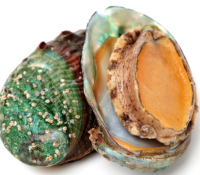

The objective of the project is to predict the age of abalone from various physical  measurements. The dataset was generated from Kaggle(https://www.kaggle.com/competitions/playground-series-s4e4). The traget variable is rings and there are has 8 features. The features with their description are:
- Sex: Categorical variable indicating the sex of the abalone.
- Length: Length of the abalone.
- Diameter: Diameter of the abalone.
- Height: Height of the abalone.
- Whole weight: Total weight of the abalone.
- Whole weight.1: Weight of the abalone after removing viscera (gut).
- Whole weight.2: Weight of the abalone after removing shell.
- Shell: Weight of the abalone shell.

# Importing Libraries

In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_log_error,make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

# Overview of the Dataset 

### Importing the Dataset

In [73]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

In [74]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('sample_submission.csv')
print ('Train dataframe')
display(train_df)
print ('Test dataframe')
display(test_df)


Train dataframe


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


Test dataframe


,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...,...
60406,151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [75]:
rows , columns = train_df.shape
print("The train data has",rows)
print("The train data has",columns)
rows , columns = test_df.shape
print("The test data has",rows)
print("The test data has",columns)

The train data has 90615
The train data has 10
The test data has 60411
The test data has 9


In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [77]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60411 entries, 0 to 60410
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              60411 non-null  int64  
 1   Sex             60411 non-null  object 
 2   Length          60411 non-null  float64
 3   Diameter        60411 non-null  float64
 4   Height          60411 non-null  float64
 5   Whole weight    60411 non-null  float64
 6   Whole weight.1  60411 non-null  float64
 7   Whole weight.2  60411 non-null  float64
 8   Shell weight    60411 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.1+ MB


# Data Cleaning 

In [78]:
#Checking missing values 
print("The train dataset has",train_df.isnull().sum().sum(), "missing values")
print("The test dataset has",test_df.isnull().sum().sum(), "missing values")


The train dataset has 0 missing values
The test dataset has 0 missing values


In [79]:
#checking duplicates 
print("Number of duplicates in the train dataset:", train_df.duplicated().sum())
print("Number of duplicates in the test dataset:", test_df.duplicated().sum())

Number of duplicates in the train dataset: 0
Number of duplicates in the test dataset: 0


#### Drop ID column

In [80]:
traindf = train_df.drop('id', axis=1)
testdf = test_df.drop('id', axis=1)

#  Explanatory Data Analysis 

In [81]:
#Distrubition of the target variable(Rings)
traindf['Rings']

0        11
1        11
2         6
3        10
4         9
         ..
90610     6
90611     9
90612     6
90613     6
90614     8
Name: Rings, Length: 90615, dtype: int64

* ### Frequency and Relative Frequency of the Target Variable

In [82]:
freq = traindf['Rings'].value_counts()
rel_freq = traindf['Rings'].value_counts(normalize=True)
freq_rel_table = pd.DataFrame({'Frequency': freq, 
                                 'Relative Frequency': rel_freq})

freq_rel_table

,Frequency,Relative Frequency
Rings,,
9,17465,0.192739
8,14499,0.160007
10,12464,0.137549
7,9008,0.099410
11,8407,0.092777
6,5411,0.059714
12,4719,0.052077
13,4074,0.044959
5,2862,0.031584


* ### Frequency and Relative Frequency of the Features 

In [83]:
columns = [col for col in traindf.columns if col not in ['Rings']]

In [84]:
for col in columns:
    print(f"Feature: {col}")
    
#Frequecy and Relative Frequency of the feature variables 
    freq_rel_freq_table = pd.DataFrame({'Frequency': traindf[col].value_counts(), 
                                 'Relative Frequency': traindf[col].value_counts(normalize=True)})
    print(freq_rel_freq_table)
 

Feature: Sex
     Frequency  Relative Frequency
Sex                               
I        33093            0.365204
M        31027            0.342405
F        26495            0.292391
Feature: Length
        Frequency  Relative Frequency
Length                               
0.5750       3267            0.036054
0.5800       2670            0.029465
0.5700       2167            0.023914
0.5500       2122            0.023418
0.5950       1992            0.021983
...           ...                 ...
0.5630          1            0.000011
0.3470          1            0.000011
0.4405          1            0.000011
0.3540          1            0.000011
0.4110          1            0.000011

[157 rows x 2 columns]
Feature: Diameter
          Frequency  Relative Frequency
Diameter                               
0.4500         4182            0.046151
0.4750         3307            0.036495
0.4550         2715            0.029962
0.4000         2667            0.029432
0.4700         2441 

### Descriptive Statistics of Numerical variables 

In [85]:
num_col = [col for col in traindf.columns if col not in ['Sex']]
num_feature= [col for col in traindf.columns if col not in ['Sex', 'Rings']]
traindf[num_col].describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.3,r=.2", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
Length,90615.000000,0.517098,0.118217,0.075000,0.445000,0.545000,0.600000,0.815000
Diameter,90615.000000,0.401679,0.098026,0.055000,0.345000,0.425000,0.470000,0.650000
Height,90615.000000,0.135464,0.038008,0.000000,0.110000,0.140000,0.160000,1.130000
Whole weight,90615.000000,0.789035,0.457671,0.002000,0.419000,0.799500,1.067500,2.825500
Whole weight.1,90615.000000,0.340778,0.204428,0.001000,0.177500,0.330000,0.463000,1.488000
Whole weight.2,90615.000000,0.169422,0.100909,0.000500,0.086500,0.166000,0.232500,0.760000
Shell weight,90615.000000,0.225898,0.130203,0.001500,0.120000,0.225000,0.305000,1.005000
Rings,90615.000000,9.696794,3.176221,1.000000,8.000000,9.000000,11.000000,29.000000


# Data Visualization

Text(0.5, 1.0, 'Distrubution of Rings')

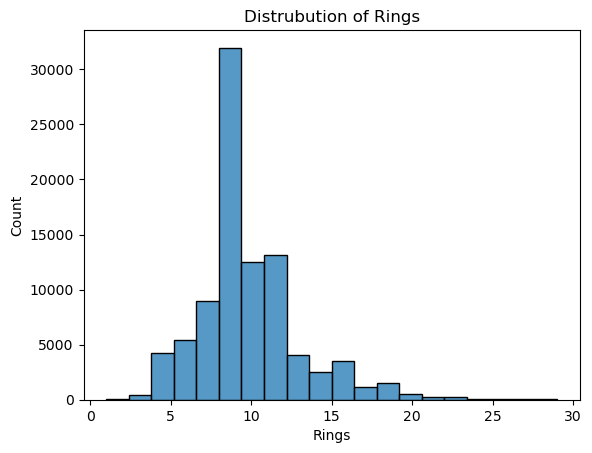

In [86]:
# Distrubution of Target Variable

sns.histplot(traindf['Rings'], bins=20)  
plt.title('Distrubution of Rings')

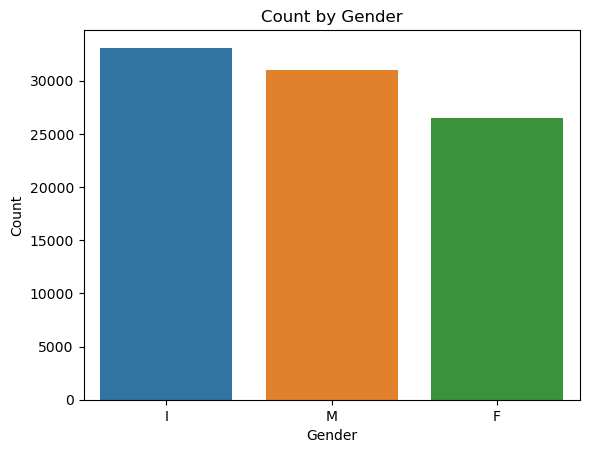

In [87]:
#sns.histplot(traindf['Sex'], bins=20)
gender_c = train_df['Sex'].value_counts()

sns.barplot(x=gender_c.index, y=gender_c.values)


plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count by Gender')
plt.show()

In [88]:
print(train_df['Sex'].value_counts())

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64


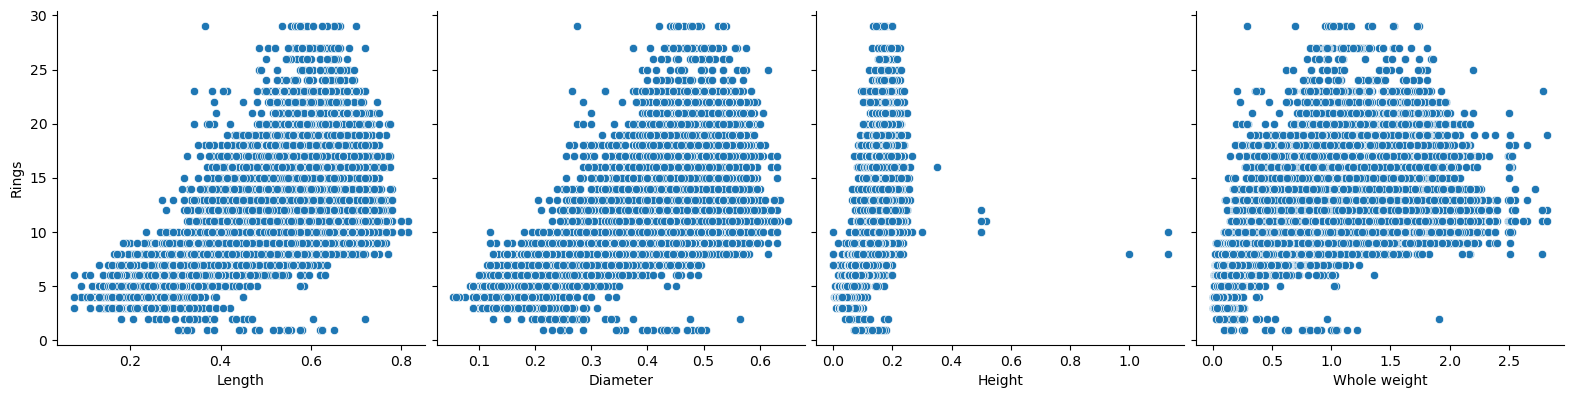

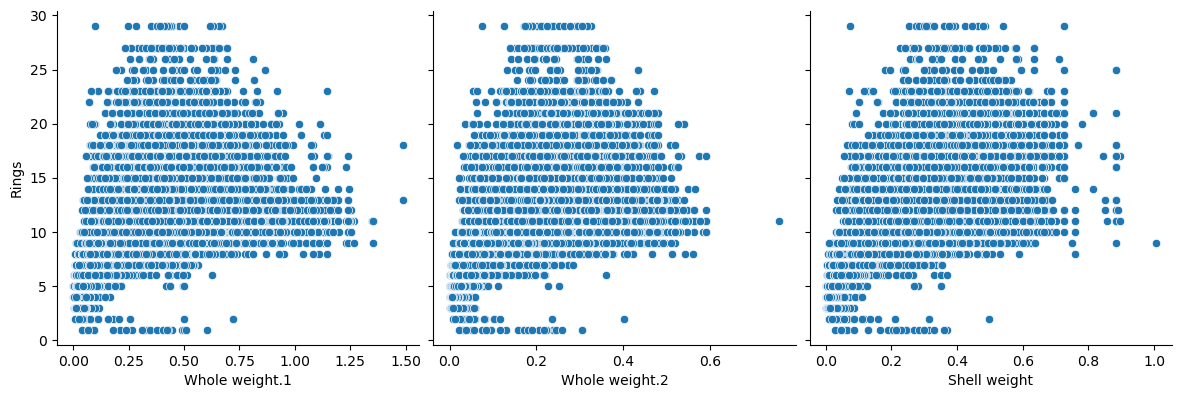

In [89]:
#Distribution of the numerical features Vs the traget variable

sns.pairplot(traindf,x_vars=['Length','Diameter','Height','Whole weight'],y_vars='Rings',height=4,kind="scatter")
plt.show()

sns.pairplot(traindf,x_vars=['Whole weight.1','Whole weight.2','Shell weight'],y_vars='Rings',height=4,kind="scatter")
plt.show()

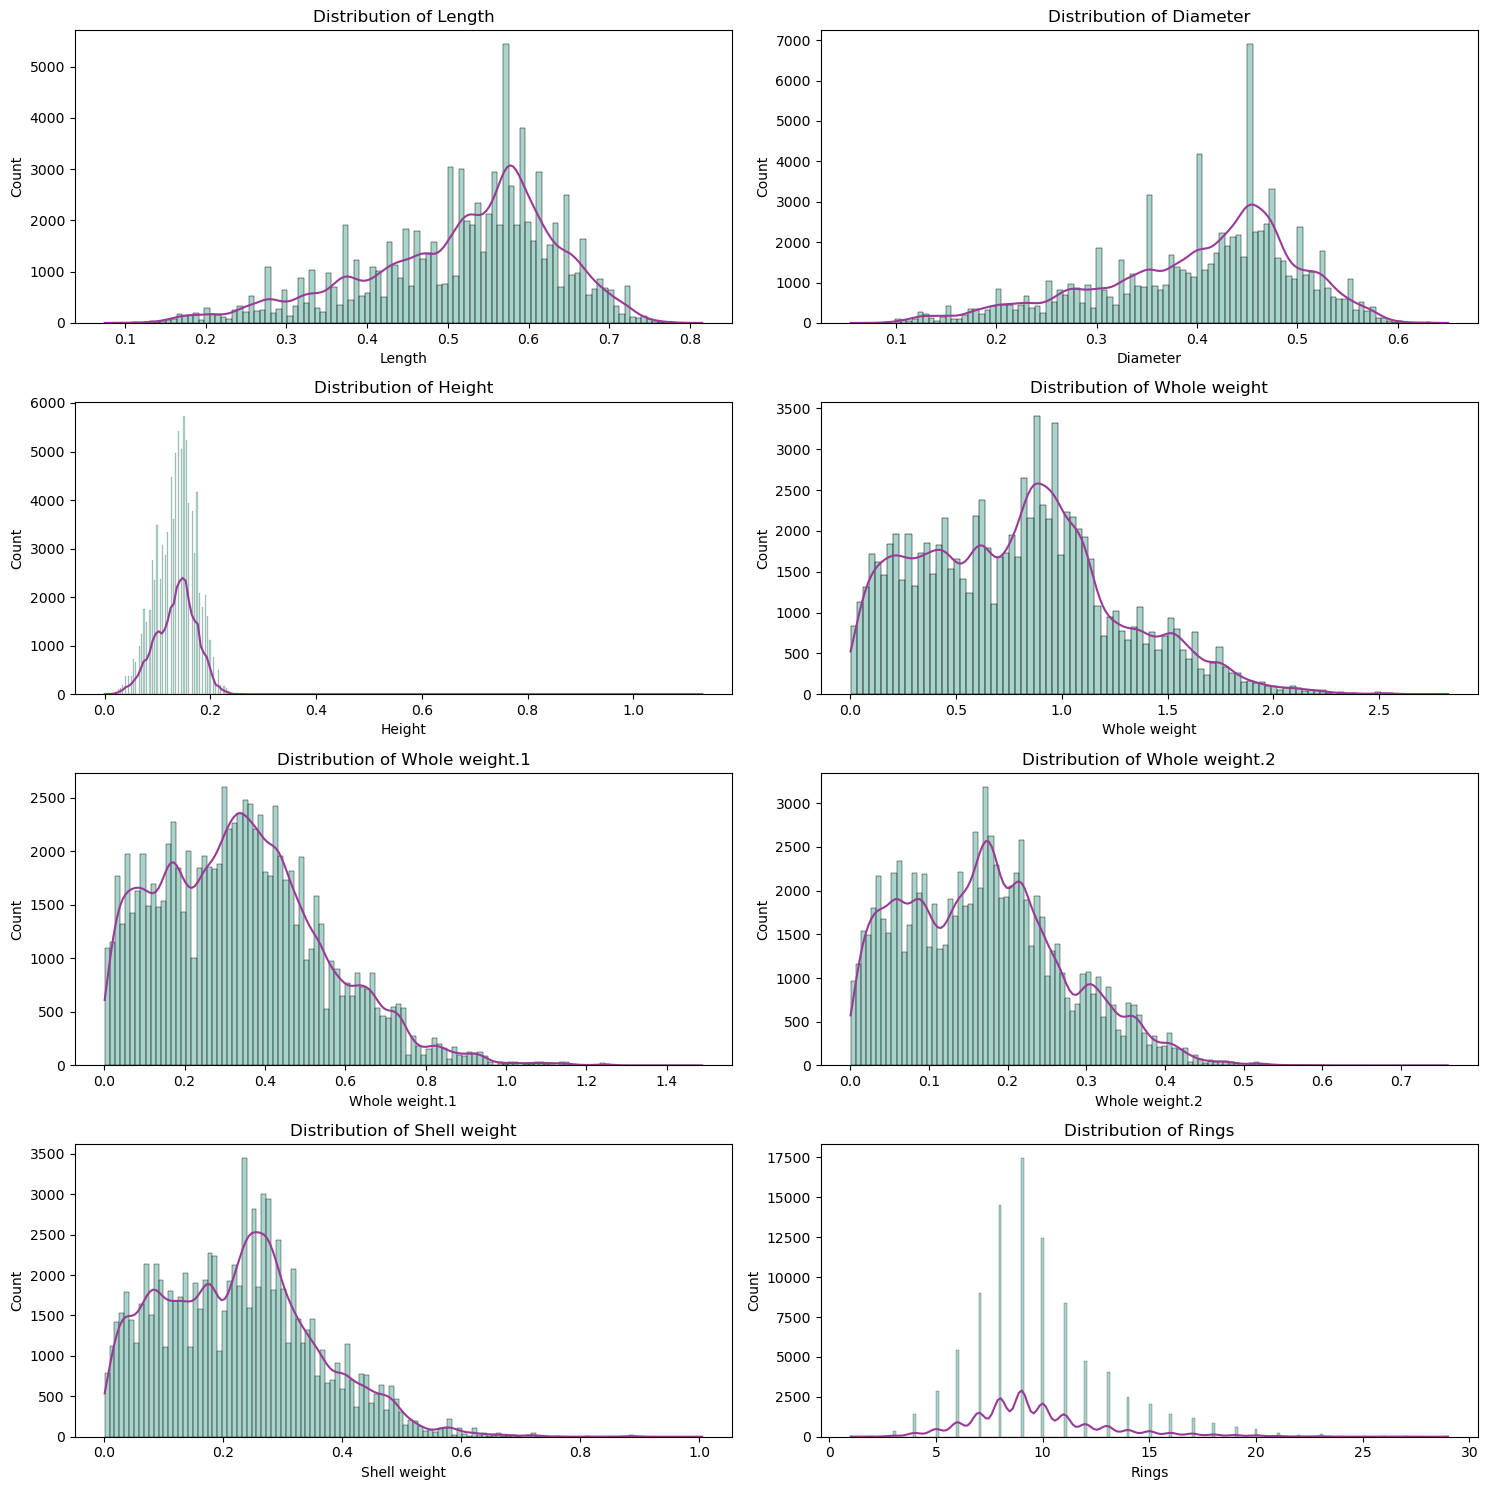

In [90]:
# Distribution of the numerical variables  
## Set a 6x3 subplots 
fig_rows = 4
fig_cols = 2
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(15,15))
axes = axes.flatten()

for i, column in enumerate(num_col):
    sns.histplot(data=traindf, x=column, color='#5A9', kde=True, ax=axes[i])
    axes[i].get_lines()[0].set_color('#993a97')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [91]:
# Apply logarithm transformation to skewed features
logtrans = FunctionTransformer(np.log1p, validate=True)
skewed_features = num_feature
traindf[skewed_features] = logtrans.fit_transform(traindf[skewed_features])
testdf[skewed_features] = logtrans.fit_transform(testdf[skewed_features])

In [92]:
#Encoding categorical feature (sex)

encode = LabelEncoder()
traindf['Sex'] = encode.fit_transform(traindf['Sex'])
testdf['Sex'] = encode.fit_transform(testdf['Sex'])


# Feature Selection using Pearson Correlation 

* ### Correlation(Feature Variable Vs Target Variable)

In [93]:
Corr_with_target_variable = traindf.corr()['Rings'].sort_values()
Corr_with_target_variable

Sex              -0.026308
Whole weight.1    0.539883
Whole weight.2    0.600576
Length            0.624140
Diameter          0.636744
Whole weight      0.641914
Height            0.670003
Shell weight      0.701334
Rings             1.000000
Name: Rings, dtype: float64

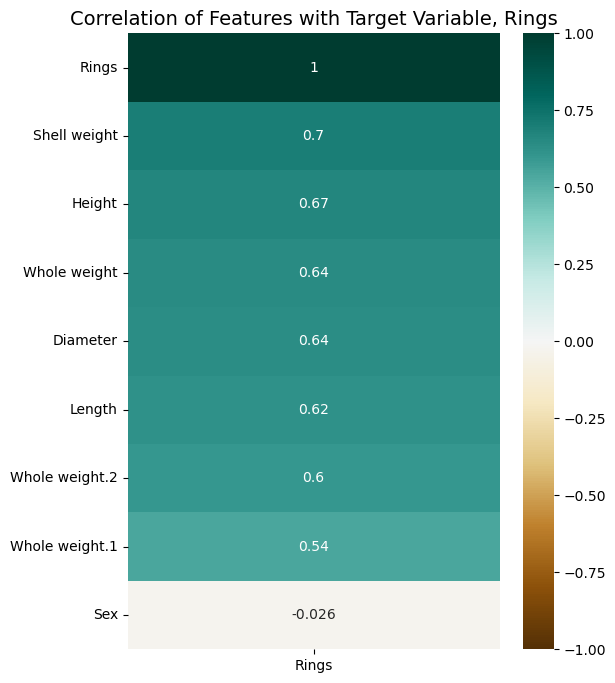

In [94]:
plt.figure(figsize=(6,8))
ax = sns.heatmap(traindf.corr()[['Rings']].sort_values(by='Rings', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set_title('Correlation of Features with Target Variable, Rings', fontdict={'fontsize':14});

* ### Collinearity

In [95]:
Corr_all_V= traindf.corr()

print("Correlation Matrix")
display(Corr_all_V)

Correlation Matrix


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Sex,1.000000,-0.019611,-0.020523,-0.029119,-0.024162,-0.016854,-0.031395,-0.031628,-0.026308
Length,-0.019611,1.000000,0.990400,0.921773,0.956930,0.924574,0.913841,0.918525,0.624140
Diameter,-0.020523,0.990400,1.000000,0.925894,0.961002,0.926126,0.917991,0.926901,0.636744
Height,-0.029119,0.921773,0.925894,1.000000,0.930611,0.887345,0.900197,0.920486,0.670003
Whole weight,-0.024162,0.956930,0.961002,0.930611,1.000000,0.974314,0.973028,0.969322,0.641914
Whole weight.1,-0.016854,0.924574,0.926126,0.887345,0.974314,1.000000,0.956107,0.927389,0.539883
Whole weight.2,-0.031395,0.913841,0.917991,0.900197,0.973028,0.956107,1.000000,0.945737,0.600576
Shell weight,-0.031628,0.918525,0.926901,0.920486,0.969322,0.927389,0.945737,1.000000,0.701334
Rings,-0.026308,0.624140,0.636744,0.670003,0.641914,0.539883,0.600576,0.701334,1.000000


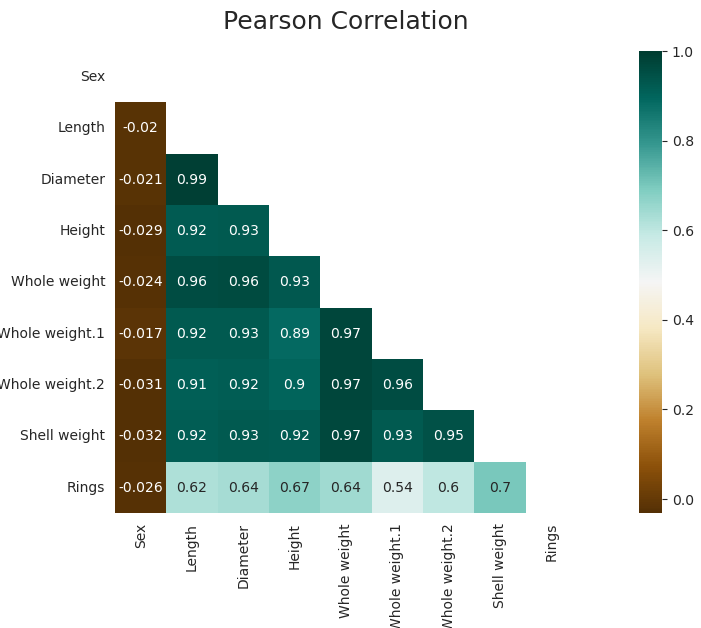

In [96]:
#Correlation of variables (features + traget variable)
mask = np.zeros_like(Corr_all_V)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 6))
    ax = sns.heatmap(Corr_all_V, mask=mask, vmax=1,annot =True, cmap='BrBG', square=True)
    ax.set_title('Pearson Correlation', fontdict={'fontsize':18}, pad=16);
    

* ### Dropping highly correlated features

In [97]:
def correlation(dataset, threshold):
    column_corr = set()
    cor_matrix = dataset.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i, j]) > threshold:
                column_name = cor_matrix.columns[i]
                column_corr.add(column_name)
    return column_corr

In [98]:
# Extract hightly correlated features - Threshold= 0.95

highly_corr_features = correlation(traindf, 0.97)
highly_corr_features

{'Diameter', 'Whole weight.1', 'Whole weight.2'}

In [99]:
#Drop Hightly correlated features ( correlation > 0.97)

#traindf.drop(highly_corr_features, axis =1, inplace=True)
#testdf.drop(highly_corr_features, axis =1, inplace=True)

In [100]:
#Dropping features that has weak relationship with the target variable 

In [101]:
#traindf = train_df.drop('Sex', axis=1)
#testdf = test_df.drop('Sex', axis=1)the

Note: Dropping the highly correlated features(which has high collinearity) and the variable which is weakly correlated with 
the traget variable didn't improve the performance of the models.    

In [102]:
#Standardizing or normalizing data

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std= scaler.transform(X_test)
testdf_std= scaler.transform(testdf)

# Data split into test and training 

In [103]:
# Data split into test and training 

X = traindf.drop(['Rings'], axis=1)
y = traindf['Rings']

y_logtrans = logtrans.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y_logtrans, test_size=0.2, random_state=100)


# Training Models 

In [104]:
# Mean Square Log Errors (RMSLE) Scorer

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


score_rmsle = make_scorer(rmsle, greater_is_better=False)

* ### Model-1: Catboosting Regressor

In [105]:
cbr_model = CatBoostRegressor()


#Training XBG Model 
cbr_model.fit(X_train, y_train)

#Making prediction 
y_pred_cbr_model = cbr_model.predict(X_test)
rmsle_cbr_model = rmsle(y_test, y_pred_cbr_model)

print("CatBoosting Regressor's rmsle is :" , rmsle_cbr_model)

Learning rate set to 0.080557
0:	learn: 0.2725412	total: 30.4ms	remaining: 30.4s
1:	learn: 0.2607548	total: 64.6ms	remaining: 32.2s
2:	learn: 0.2503856	total: 100ms	remaining: 33.3s
3:	learn: 0.2406911	total: 133ms	remaining: 33.1s
4:	learn: 0.2317763	total: 160ms	remaining: 31.8s
5:	learn: 0.2241754	total: 193ms	remaining: 31.9s
6:	learn: 0.2171411	total: 219ms	remaining: 31.1s
7:	learn: 0.2108711	total: 249ms	remaining: 30.8s
8:	learn: 0.2052147	total: 265ms	remaining: 29.2s
9:	learn: 0.2003136	total: 291ms	remaining: 28.8s
10:	learn: 0.1959094	total: 317ms	remaining: 28.5s
11:	learn: 0.1919007	total: 342ms	remaining: 28.1s
12:	learn: 0.1885679	total: 360ms	remaining: 27.3s
13:	learn: 0.1855269	total: 375ms	remaining: 26.4s
14:	learn: 0.1828805	total: 408ms	remaining: 26.8s
15:	learn: 0.1804516	total: 460ms	remaining: 28.3s
16:	learn: 0.1783832	total: 543ms	remaining: 31.4s
17:	learn: 0.1763827	total: 621ms	remaining: 33.9s
18:	learn: 0.1746815	total: 654ms	remaining: 33.7s
19:	learn

183:	learn: 0.1502351	total: 2.75s	remaining: 12.2s
184:	learn: 0.1501968	total: 2.76s	remaining: 12.2s
185:	learn: 0.1501796	total: 2.77s	remaining: 12.1s
186:	learn: 0.1501560	total: 2.78s	remaining: 12.1s
187:	learn: 0.1501300	total: 2.79s	remaining: 12s
188:	learn: 0.1501274	total: 2.8s	remaining: 12s
189:	learn: 0.1501207	total: 2.81s	remaining: 12s
190:	learn: 0.1500909	total: 2.81s	remaining: 11.9s
191:	learn: 0.1500888	total: 2.82s	remaining: 11.9s
192:	learn: 0.1500616	total: 2.83s	remaining: 11.8s
193:	learn: 0.1500300	total: 2.84s	remaining: 11.8s
194:	learn: 0.1499985	total: 2.85s	remaining: 11.8s
195:	learn: 0.1499814	total: 2.86s	remaining: 11.7s
196:	learn: 0.1499727	total: 2.87s	remaining: 11.7s
197:	learn: 0.1499373	total: 2.88s	remaining: 11.6s
198:	learn: 0.1499167	total: 2.88s	remaining: 11.6s
199:	learn: 0.1499056	total: 2.89s	remaining: 11.6s
200:	learn: 0.1498848	total: 2.9s	remaining: 11.5s
201:	learn: 0.1498831	total: 2.9s	remaining: 11.5s
202:	learn: 0.1498475

342:	learn: 0.1474752	total: 3.99s	remaining: 7.64s
343:	learn: 0.1474731	total: 4s	remaining: 7.62s
344:	learn: 0.1474550	total: 4.01s	remaining: 7.61s
345:	learn: 0.1474336	total: 4.01s	remaining: 7.59s
346:	learn: 0.1474145	total: 4.02s	remaining: 7.57s
347:	learn: 0.1474001	total: 4.03s	remaining: 7.56s
348:	learn: 0.1473733	total: 4.04s	remaining: 7.54s
349:	learn: 0.1473529	total: 4.05s	remaining: 7.52s
350:	learn: 0.1473399	total: 4.06s	remaining: 7.51s
351:	learn: 0.1473156	total: 4.07s	remaining: 7.49s
352:	learn: 0.1473023	total: 4.08s	remaining: 7.47s
353:	learn: 0.1472936	total: 4.08s	remaining: 7.45s
354:	learn: 0.1472767	total: 4.09s	remaining: 7.43s
355:	learn: 0.1472588	total: 4.1s	remaining: 7.42s
356:	learn: 0.1472301	total: 4.11s	remaining: 7.41s
357:	learn: 0.1472150	total: 4.12s	remaining: 7.39s
358:	learn: 0.1472012	total: 4.13s	remaining: 7.37s
359:	learn: 0.1471840	total: 4.13s	remaining: 7.35s
360:	learn: 0.1471583	total: 4.14s	remaining: 7.33s
361:	learn: 0.14

519:	learn: 0.1452558	total: 5.45s	remaining: 5.03s
520:	learn: 0.1452425	total: 5.46s	remaining: 5.02s
521:	learn: 0.1452325	total: 5.47s	remaining: 5.01s
522:	learn: 0.1452213	total: 5.48s	remaining: 4.99s
523:	learn: 0.1452138	total: 5.48s	remaining: 4.98s
524:	learn: 0.1452012	total: 5.49s	remaining: 4.97s
525:	learn: 0.1451866	total: 5.5s	remaining: 4.96s
526:	learn: 0.1451685	total: 5.51s	remaining: 4.95s
527:	learn: 0.1451602	total: 5.52s	remaining: 4.93s
528:	learn: 0.1451586	total: 5.53s	remaining: 4.92s
529:	learn: 0.1451521	total: 5.54s	remaining: 4.91s
530:	learn: 0.1451414	total: 5.54s	remaining: 4.89s
531:	learn: 0.1451319	total: 5.55s	remaining: 4.88s
532:	learn: 0.1451200	total: 5.56s	remaining: 4.87s
533:	learn: 0.1451187	total: 5.57s	remaining: 4.86s
534:	learn: 0.1450998	total: 5.58s	remaining: 4.85s
535:	learn: 0.1450802	total: 5.58s	remaining: 4.83s
536:	learn: 0.1450752	total: 5.59s	remaining: 4.82s
537:	learn: 0.1450700	total: 5.6s	remaining: 4.81s
538:	learn: 0.

688:	learn: 0.1436485	total: 6.88s	remaining: 3.1s
689:	learn: 0.1436355	total: 6.89s	remaining: 3.1s
690:	learn: 0.1436232	total: 6.9s	remaining: 3.08s
691:	learn: 0.1436078	total: 6.91s	remaining: 3.07s
692:	learn: 0.1435999	total: 6.92s	remaining: 3.06s
693:	learn: 0.1435926	total: 6.92s	remaining: 3.05s
694:	learn: 0.1435835	total: 6.93s	remaining: 3.04s
695:	learn: 0.1435785	total: 6.94s	remaining: 3.03s
696:	learn: 0.1435688	total: 6.95s	remaining: 3.02s
697:	learn: 0.1435449	total: 6.96s	remaining: 3.01s
698:	learn: 0.1435342	total: 6.96s	remaining: 3s
699:	learn: 0.1435294	total: 6.97s	remaining: 2.99s
700:	learn: 0.1435238	total: 6.98s	remaining: 2.98s
701:	learn: 0.1435174	total: 6.99s	remaining: 2.97s
702:	learn: 0.1435086	total: 6.99s	remaining: 2.95s
703:	learn: 0.1434941	total: 7s	remaining: 2.94s
704:	learn: 0.1434834	total: 7.01s	remaining: 2.93s
705:	learn: 0.1434739	total: 7.02s	remaining: 2.92s
706:	learn: 0.1434585	total: 7.03s	remaining: 2.91s
707:	learn: 0.1434522

859:	learn: 0.1421264	total: 8.29s	remaining: 1.35s
860:	learn: 0.1421166	total: 8.3s	remaining: 1.34s
861:	learn: 0.1421092	total: 8.31s	remaining: 1.33s
862:	learn: 0.1421061	total: 8.32s	remaining: 1.32s
863:	learn: 0.1420939	total: 8.33s	remaining: 1.31s
864:	learn: 0.1420801	total: 8.33s	remaining: 1.3s
865:	learn: 0.1420665	total: 8.34s	remaining: 1.29s
866:	learn: 0.1420547	total: 8.35s	remaining: 1.28s
867:	learn: 0.1420493	total: 8.36s	remaining: 1.27s
868:	learn: 0.1420440	total: 8.37s	remaining: 1.26s
869:	learn: 0.1420270	total: 8.38s	remaining: 1.25s
870:	learn: 0.1420195	total: 8.39s	remaining: 1.24s
871:	learn: 0.1420121	total: 8.4s	remaining: 1.23s
872:	learn: 0.1420055	total: 8.4s	remaining: 1.22s
873:	learn: 0.1419926	total: 8.41s	remaining: 1.21s
874:	learn: 0.1419828	total: 8.42s	remaining: 1.2s
875:	learn: 0.1419721	total: 8.43s	remaining: 1.19s
876:	learn: 0.1419686	total: 8.44s	remaining: 1.18s
877:	learn: 0.1419641	total: 8.44s	remaining: 1.17s
878:	learn: 0.141

 * ### Model-2: Gradient Boosting Regressor

In [106]:
#pipeline with hyperparameters
pipe_gbr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor())
])
param = {
     'regressor__n_estimators': [300],
    'regressor__learning_rate': [0.1],
     'regressor__min_samples_split': [6],
    'regressor__subsample': [0.9],
    'regressor__max_depth': [5],
    'regressor__min_samples_leaf': [4],
   
}

# Defining CV
kf = KFold(n_splits=5, shuffle=True, random_state=100)

# GridSearchCV for hyperparameter tuning and CV
grid_srh = GridSearchCV(pipe_gbr, param, cv=kf, scoring=score_rmsle, error_score='raise')
grid_srh.fit(X_train, y_train)

best_gbr = grid_srh.best_estimator_
best_gbr.fit(X_train, y_train)

y_pred_gbr = np.expm1(best_gbr.predict(X_test))

# Computing RMSLE Score
rmsle_score = rmsle(np.expm1(y_test), y_pred_gbr)
print("GBR Regressor's rmsle score is :", rmsle_score)

GBR Regressor's rmsle score is : 0.14826029578644168


 * ### Model-3:  XGB Regressor 

In [77]:
#pipeline with hyperparameters
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor())
])
param_xgb =  {
        'regressor__verbosity': [0],
         #'regressor__early_stopping_rounds': [25],
         'regressor__eval_metric': ['rmse'],
       'regressor__n_estimators': [1500],
        'regressor__random_state': [1200],
        'regressor__objective': ['reg:squarederror'],
        'regressor__learning_rate': [0.01],
        'regressor__random_state': [1000],
        'regressor__subsample': [0.70],
        'regressor__colsample_bytree': [0.50],
        'regressor__max_depth': [8]
}


# Defining CV
kf = KFold(n_splits=5, shuffle=True, random_state=500)

# GridSearchCV for hyperparameter tuning and CV
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=kf, scoring=score_rmsle, error_score='raise')
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
best_xgb.fit(X_train, y_train)

y_pred_xgb = np.expm1(best_xgb.predict(X_test))

# Computing RMSLE Score
rmsle_score_xgb = rmsle(np.expm1(y_test), y_pred_xgb)
print("XGB Regressor's rmsle score is :", rmsle_score_xgb)

XGB Regressor's rmsle score is : 0.14870655822472412


* ### Model-4:  CatBoostRegressor Model

In [35]:
#pipeline with hyperparameters
pipe_cbr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', CatBoostRegressor())
])
param_cbr =  {
        #'regressor__min_child_weight': [1, 5, 10],
       'regressor__logging_level':[ 'Silent'],
       'regressor__grow_policy': ['Lossguide'],
        'regressor__random_state': [500],
        'regressor__eval_metric' : ['RMSE'], 
        'regressor__depth': [14],
        'regressor__random_strength': [14],
         'regressor__l2_leaf_reg': [2.5],
        'regressor__min_data_in_leaf': [2.5],
         'regressor__max_leaves': [60],
     'regressor__max_leaves': [60],
     'regressor__learning_rate': [0.04],
      'regressor__subsample': [0.70],
        'regressor__max_bin': [400],
        }


# Defining CV
kf = KFold(n_splits=5, shuffle=True, random_state=100)

# GridSearchCV for hyperparameter tuning and CV
grid_cbr = GridSearchCV(pipe_cbr, param_cbr, cv=kf, scoring=score_rmsle, error_score='raise')
grid_cbr.fit(X_train, y_train)

best_cbr = grid_cbr.best_estimator_
best_cbr.fit(X_train, y_train)

y_pred_cbr = np.expm1(best_cbr.predict(X_test))

# Computing RMSLE Score
rmsle_score_cbr = rmsle(np.expm1(y_test), y_pred_cbr)
print("GBR Regressor's rmsle score is :", rmsle_score_cbr)




GBR Regressor's rmsle score is : 0.14799014888081363


* ### Model-5: GradientBoostingRegressor 

In [107]:
gbr_model = GradientBoostingRegressor()


#Training XBG Model 
gbr_model.fit(X_train, y_train)

#Making prediction 
y_pred_gbr_model = gbr_model.predict(X_test)
rmsle_gbr_model = rmsle(y_test, y_pred_gbr_model)

print("Gradient Boosting Regressor's rmsle is :" , rmsle_gbr_model)

Gradient Boosting Regressor's rmsle is : 0.04542472983098679


* ### Model 6- Lightgbm Model

In [108]:
#Model 4- LGM Model 

import lightgbm as lgb
lgb_model =  lgb.LGBMRegressor( n_estimators = 1000, 
          learning_rate = 0.04, 
          num_leaves = 52, 
          max_depth = 11, 
          min_child_samples = 71, 
          subsample = 0.67, 
          colsample_bytree = 0.76, 
          reg_alpha = 0.87, 
          reg_lambda = 0.86,
           verbosity = -2)
#Training XBG Model 
lgb_model.fit(X_train, y_train)

#Making prediction 
y_pred_lgb_model = lgb_model.predict(X_test)
rmsle_lgb_model = rmsle(y_test, y_pred_lgb_model)

print("LGBM Regressor's rmsle is :" , rmsle_lgb_model)

LGBM Regressor's rmsle is : 0.04423031038142004


This is the best model.

* ### Model-7: Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:

#from sklearn.linear_model import LinearRegression

reg = LinearRegression() 


#Training XBG Model 
reg.fit(X_train_std, y_train)

#Making prediction 
y_pred_reg_model = reg.predict(X_test_std)
rmsle_reg_model = rmsle(y_test, np.abs(y_pred_reg_model))



print("Linear Regression's rmsle is :" , rmsle_reg_model)


Linear Regression's rmsle is : 0.048339373548639854


# Model Deploment

In [111]:
y_pred_log = lgb_model.predict(testdf)

# Submission

In [112]:
pred_test_r = np.expm1(y_pred_log)
ypred = pred_test_r

In [113]:
submission_df  = pd.DataFrame(columns = ['id', 'Rings'])
submission_df['id'] = test_df['id']
submission_df['Rings'] = ypred

In [114]:
submission_df.head()

,id,Rings
0,90615,9.907123
1,90616,9.695474
2,90617,9.826659
3,90618,10.675298
4,90619,7.630290


In [115]:
submission_df.to_csv('submission.csv', index = False)

Reference:
1. https://www.kaggle.com/code/riskyandrean/abalone
2. https://www.kaggle.com/competitions/playground-series-s4e4